<a href="https://colab.research.google.com/github/yusfuruhashi/test/blob/master/%E3%83%97%E3%83%AD%E3%82%B8%E3%82%A7%E3%82%AF%E3%83%88%E5%9E%8B%E3%83%8F%E3%83%83%E3%82%AB%E3%82%BD%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import cv2

In [59]:
img = cv2.imread('/content/drive/My Drive/dataset/0/Afghan Hound/000003.jpg')

In [60]:
def preprocess(img):
    h, w, c = img.shape
    longest_edge = max(h, w)
    top = 0
    bottom = 0
    left = 0
    right = 0
    if h < longest_edge:
        diff_h = longest_edge - h
        top = diff_h // 2
        bottom = diff_h - top
    elif w < longest_edge:
        diff_w = longest_edge - w
        left = diff_w // 2
        right = diff_w - left
    else:
        pass
    
    img = cv2.copyMakeBorder(img, top, bottom, left, right,
                             cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return img

img = preprocess(img)
img = cv2.resize(img, dsize=(299, 299))

In [61]:
# 変数のクラスを確認
type(img)

numpy.ndarray

In [62]:
# 詳細なデータ型の確認
img.dtype

dtype('uint8')

In [63]:
import matplotlib.pyplot as plt

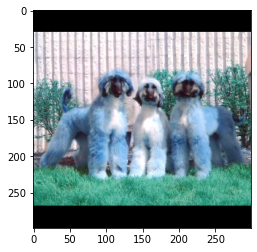

In [64]:
plt.imshow(img)

In [65]:
# BGR -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

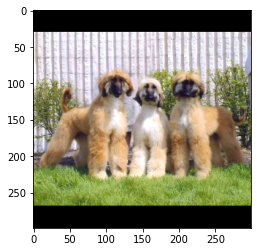

In [66]:
plt.imshow(img_rgb)

In [1]:
from glob import glob
import shutil
import cv2
import os
from sklearn.cluster import KMeans
import numpy as np

IMAGE_DIR="/content/drive/My Drive/dataset/0/Afghan Hound/*"
OUTPUT_DIR="/content/drive/My Drive/data/kekka"

# 画像をnumpy配列で読み込み、変形
impathlist = glob(IMAGE_DIR)
##for p in impathlist:
#  print(p)

In [20]:
#cv2.imread("/content/drive/My Drive/dataset/0/Afghan Hound/000522.gif")

In [ ]:
#np.array([cv2.resize(cv2.imread("/content/drive/My Drive/dataset/0/Afghan Hound/000522.gif"), (64, 64), cv2.INTER_CUBIC)])


In [143]:
#from PIL import Image
for p in impathlist:
  #print(p)
  if  'gif' not in p and '320' not in p:
#    print(p) 
#    im = Image.open(p).convert('RGB')
#    print(type(cv2.imread(p)))
#    print(type(im))
#    np.array([cv2.resize(im, (64, 64), cv2.INTER_CUBIC)])
#  else:
    features = np.array([cv2.resize(cv2.imread(p), (64, 64), cv2.INTER_CUBIC)])
    features_grey = np.array([cv2.resize(cv2.cvtColor(cv2.imread(p), cv2.COLOR_RGB2GRAY),  (64, 64), cv2.INTER_CUBIC)])

In [146]:
#features_1 = features.reshape(features.shape[0], -1)
features_1 = features.reshape(features.shape[0], -1)
features_1.shape

(1, 12288)

In [133]:
features.shape

(1, 64, 64, 3)

In [144]:
features_grey.shape

(1, 64, 64)

In [147]:
# モデルの作成
#features3 = np.array([features]) 
#features2 = features3.reshape(len(features3), -1).astype(np.float64)
model = KMeans(n_clusters=10).fit(features_1)

# クラスタ数を変更して試したいので古い出力結果は消す
for i in range(model.n_clusters):
    cluster_dir = OUTPUT_DIR + "/cluster{}".format(i)
    if os.path.exists(cluster_dir):
        shutil.rmtree(cluster_dir)
    os.makedirs(cluster_dir)
# 結果をクラスタごとにディレクトリに保存
for label, p in zip(model.labels_, impathlist):
    shutil.copyfile(p, OUTPUT_DIR + '/cluster{}/{}'.format(label, p.split('/')[-1]))

ValueError: ignored